# Different CNN Arcitectures on MNIST dataset

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [31]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid(True)
    fig.canvas.draw()

## [1] CNN with 3 Conv-layers and 3*3 Kernels

In [33]:
# Initialising the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 5, 5, 128)         0         
__________

In [34]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 233s 4ms/step - loss: 0.2207 - acc: 0.9294 - val_loss: 0.0454 - val_acc: 0.9854
Epoch 2/12
60000/60000 [==============================] - 229s 4ms/step - loss: 0.0708 - acc: 0.9783 - val_loss: 0.0280 - val_acc: 0.9908
Epoch 3/12
60000/60000 [==============================] - 228s 4ms/step - loss: 0.0497 - acc: 0.9849 - val_loss: 0.0253 - val_acc: 0.9921
Epoch 4/12
60000/60000 [==============================] - 228s 4ms/step - loss: 0.0420 - acc: 0.9870 - val_loss: 0.0197 - val_acc: 0.9924
Epoch 5/12
60000/60000 [==============================] - 229s 4ms/step - loss: 0.0370 - acc: 0.9884 - val_loss: 0.0225 - val_acc: 0.9926
Epoch 6/12
60000/60000 [==============================] - 228s 4ms/step - loss: 0.0317 - acc: 0.9901 - val_loss: 0.0245 - val_acc: 0.9914
Epoch 7/12
60000/60000 [==============================] - 228s 4ms/step - loss: 0.0288 - acc: 0.9908 - val_loss: 0.0207 - 

Test score: 0.01959968186629021
Test accuracy: 0.9947


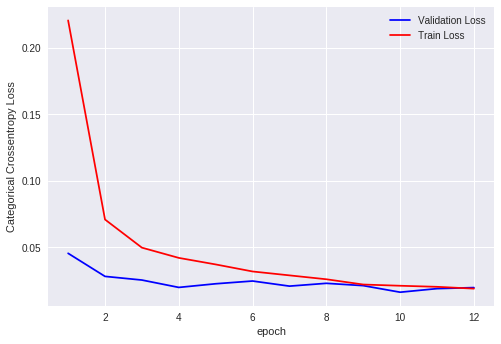

In [35]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## [2] CNN with 5 Conv-layers and 5*5 Kernels

In [36]:
# Initialising the model
model = Sequential()
model.add(Conv2D(16, kernel_size=(5,5), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5,5), padding='same', activation='relu'))
model.add(Conv2D(128, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 24, 24, 32)        12832     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 12, 12, 64)        51264     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 6, 6, 64)          0         
__________

In [37]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 365s 6ms/step - loss: 1.9656 - acc: 0.3308 - val_loss: 1.3317 - val_acc: 0.5199
Epoch 2/12
60000/60000 [==============================] - 362s 6ms/step - loss: 0.3245 - acc: 0.9006 - val_loss: 0.1611 - val_acc: 0.9541
Epoch 3/12
60000/60000 [==============================] - 377s 6ms/step - loss: 0.1238 - acc: 0.9639 - val_loss: 0.0447 - val_acc: 0.9868
Epoch 4/12
60000/60000 [==============================] - 380s 6ms/step - loss: 0.0845 - acc: 0.9762 - val_loss: 0.0538 - val_acc: 0.9824
Epoch 5/12
60000/60000 [==============================] - 380s 6ms/step - loss: 0.0644 - acc: 0.9819 - val_loss: 0.0297 - val_acc: 0.9907
Epoch 6/12
60000/60000 [==============================] - 377s 6ms/step - loss: 0.0545 - acc: 0.9853 - val_loss: 0.0224 - val_acc: 0.9929
Epoch 7/12
60000/60000 [==============================] - 359s 6ms/step - loss: 0.0458 - acc: 0.9869 - val_loss: 0.0266 - 

Test score: 0.024784034004984277
Test accuracy: 0.9926


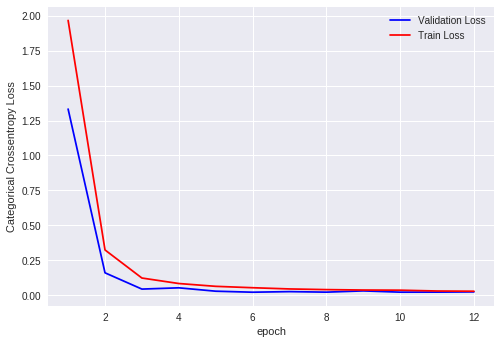

In [38]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## [3] CNN with 7 Conv-layers and 2*2 Kernels

In [0]:
# Initialising the model
model = Sequential()
model.add(Conv2D(8, kernel_size=(2,2), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (2,2), padding='same', activation='relu'))
model.add(Conv2D(64, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (2,2), padding='same', activation='relu'))
model.add(Conv2D(128, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 8)         40        
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 27, 27, 16)        528       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 7, 7, 32)          0         
__________

In [0]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.6801 - acc: 0.7686 - val_loss: 0.0954 - val_acc: 0.9685
Epoch 2/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1731 - acc: 0.9492 - val_loss: 0.0684 - val_acc: 0.9787
Epoch 3/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1223 - acc: 0.9635 - val_loss: 0.0554 - val_acc: 0.9829
Epoch 4/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1047 - acc: 0.9693 - val_loss: 0.0390 - val_acc: 0.9872
Epoch 5/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0896 - acc: 0.9740 - val_loss: 0.0342 - val_acc: 0.9885
Epoch 6/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0800 - acc: 0.9768 - val_loss: 0.0347 - val_acc: 0.9894
Epoch 7/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0771 - acc: 0.9776 - val_loss: 0.0404 - val_acc

Test score: 0.024525815289540332
Test accuracy: 0.9925


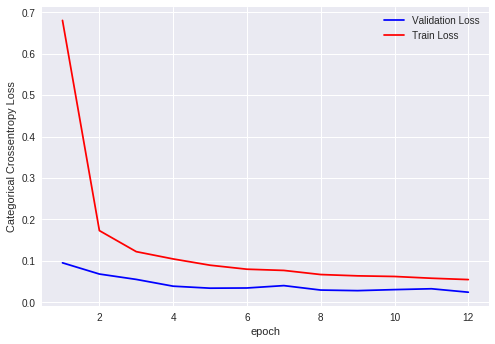

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [3]:
from prettytable import PrettyTable    
x = PrettyTable()
 
x.field_names = ["MLP_MODEL", "TRAIN_ACCURACY", "TEST_ACCURACY"]

x.add_row(["CNN(3-conv-layers) with Kernel-size=(3,3)", 0.993, 0.994])
x.add_row(["CNN(5-conv-layers) with Kernel-size=(5,5)", 0.991, 0.992])
x.add_row(["CNN(7-conv-layers) with Kernel-size=(2,2)", 0.983, 0.992])

print('\t\t\tCNN WITH DIFFERNET ARCHITECTURES')
print(x)

			CNN WITH DIFFERNET ARCHITECTURES
+-------------------------------------------+----------------+---------------+
|                 MLP_MODEL                 | TRAIN_ACCURACY | TEST_ACCURACY |
+-------------------------------------------+----------------+---------------+
| CNN(3-conv-layers) with Kernel-size=(3,3) |     0.993      |     0.994     |
| CNN(5-conv-layers) with Kernel-size=(5,5) |     0.991      |     0.992     |
| CNN(7-conv-layers) with Kernel-size=(2,2) |     0.983      |     0.992     |
+-------------------------------------------+----------------+---------------+


## Conclusion


1.   From this task we get to know that the CNN works better with the image data than MLP.
2.   CNN is taking less epochs(epochs=12) to converge than MLP which is taking more epochs(epochs=20) to converge.
